# K-Means Clustering | Intro

### Importing libraries

In [1]:
import random 
import numpy as np 
import matplotlib.pyplot as plt 
from sklearn.cluster import KMeans 
from sklearn.datasets import make_blobs 
%matplotlib inline

### sample-for-introduction

- #### np.random.seed(0) makes the random numbers predictable and saves status of numbers


In [2]:
np.random.seed(0)

- The make_blobs() function can be used to generate blobs of points with a Gaussian distribution
- [4,4], [-2, -1], [2, -3], [1, 1] shows we have 4 center points
- centers: center point

In [38]:
X, y = make_blobs(n_samples=6000, centers=[[4,4], [-2, -1], [2, -3], [1, 1]], cluster_std=0.5) 

In [39]:
print(X.shape)
print(X[:5])
print(y[:5])

(6000, 2)
[[ 1.69888749 -2.91653673]
 [ 2.20152291 -2.86996136]
 [ 1.68664415  0.71482727]
 [ 1.26894831 -3.77185202]
 [ 3.74614128  3.30796982]]
[2 2 3 2 0]


- #### Displaying the scatter plot of the randomly generated data.

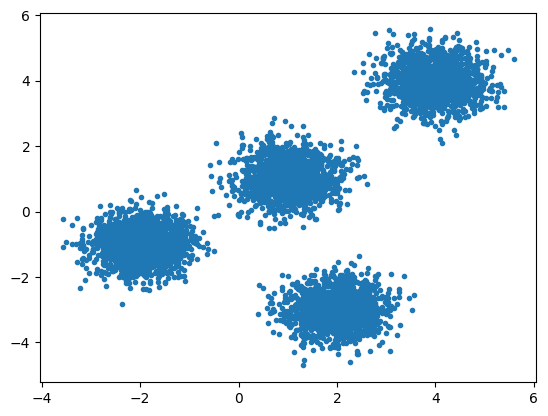

In [40]:
plt.scatter(X[:, 0], X[:, 1], marker='.') # marker is sign

### setting K-means

- init: Initialization method of the centroids
- n-clusters: The number of clusters to form as well as the number of centroids to generate
- Number of time the k-means algorithm will be run with different centroid seeds. The final results will be the best output of n_init consecutive runs in terms of inertia

In [41]:
k_means = KMeans(init = "k-means++", n_clusters = 4, n_init = 12)

In [43]:
k_means.fit(X)

KMeans(n_clusters=4, n_init=12)

In [44]:
k_means_labels = k_means.labels_
k_means_labels

array([0, 0, 1, ..., 3, 2, 3], dtype=int32)

We will also get the coordinates of the cluster centers using KMeans' <b> .cluster_centers\_ </b> and save it as <b> k_means_cluster_centers </b>.


In [45]:
k_means_cluster_centers = k_means.cluster_centers_
k_means_cluster_centers #   ->    [4,4], [-2, -1], [2, -3], [1, 1]

array([[ 1.97964653, -2.97769657],
       [ 1.00211513,  1.01354082],
       [ 3.98187102,  3.98271067],
       [-1.98041129, -1.0298807 ]])

## creating plot

In [46]:
#for example

# z = np.asanyarray([1,5,1,313,5,3,1,3])
# z == 1

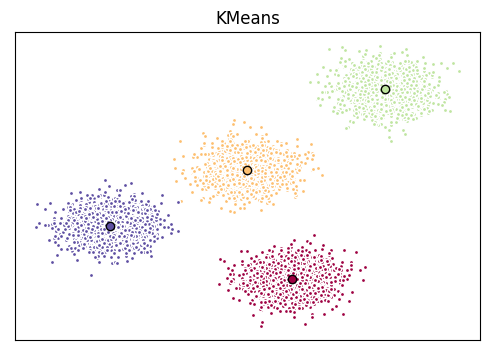

In [47]:
# Initialize the plot with the specified dimensions.
fig = plt.figure(figsize=(6, 4))

# Colors uses a color map, which will produce an array of colors based on
# the number of labels there are. We use set(k_means_labels) to get the
# unique labels.
colors = plt.cm.Spectral(np.linspace(0, 1, len(set(k_means_labels))))

# Create a plot
ax = fig.add_subplot(1, 1, 1)

# For loop that plots the data points and centroids.
# k will range from 0-3, which will match the possible clusters that each
# data point is in.
for k, col in zip(range(len(k_means_cluster_centers)), colors):

    # Create a list of all data points, where the data points that are 
    # in the cluster (ex. cluster 0) are labeled as true, else they are
    # labeled as false.
    my_members = (k_means_labels == k)
    
    # Define the centroid, or cluster center.
    cluster_center = k_means_cluster_centers[k]
    
    # Plots the datapoints with color col.
    ax.plot(X[my_members, 0], X[my_members, 1], 'w', markerfacecolor=col, marker='.')
    
    # Plots the centroids with specified color, but with a darker outline
    ax.plot(cluster_center[0], cluster_center[1], 'o', markerfacecolor=col,  markeredgecolor='k', markersize=6)

# Title of the plot
ax.set_title('KMeans')

# Remove x-axis ticks
ax.set_xticks(())

# Remove y-axis ticks
ax.set_yticks(())

# Show the plot
plt.show()
